In [1]:
import sys

import random 

from src.tdde13.data_handling import * #
from src.tdde13.evaluation import * 
from sklearn.feature_extraction.text import CountVectorizer # we could have use TfidfVectorizer too. From sklearn doc : "tf-idf vectors are also known to work well in practice"
from sklearn.preprocessing import LabelEncoder

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# Stochastic Graph assisted Genre Classification

In this notebook we show how to reproduce the main results of our report. Specifically, we compare the GloVe embedding and the count vectorizer, and a MLP and a GNN for the models. 

## Baseline: Multilayer Perceptron

Change the ```use_glove``` parameter to switch between the embeddings.

In [5]:
from src.tdde13.baselines import MLP

X_train, X_val, X_test, y_train, y_val, y_test = get_data()

use_glove = False
if use_glove:
    # print(X_train)

    X_train_transformed = glove_embedding(X_train)
    X_val_transformed = glove_embedding(X_val)
    X_test_transformed = glove_embedding(X_test)

    # assert False, "embedding"
else:
    vectorizer = CountVectorizer()
    X_train_transformed = vectorizer.fit_transform(X_train)
    X_val_transformed = vectorizer.transform(X_val)
    X_test_transformed = vectorizer.transform(X_test)

    X_train_transformed = construct_sparse_tensor(X_train_transformed.tocoo())
    X_val_transformed = construct_sparse_tensor(X_val_transformed.tocoo())
    X_test_transformed = construct_sparse_tensor(X_test_transformed.tocoo())

10000
9892


In [6]:
input_size = X_train_transformed.shape[1]
output_size = 10

y_train = LabelEncoder().fit_transform(y_train)
y_val = LabelEncoder().fit_transform(y_val)
y_test = LabelEncoder().fit_transform(y_test)

y_train = torch.tensor(y_train)
y_val = torch.tensor(y_val)
y_test = torch.tensor(y_test)

hparams = {
    "lr" : 0.0002,
    "epochs" : 35, # 15,
    "batch_size" : 128,
    "patience" : 5
}

Epoch: 0


100%|██████████| 8/8 [00:00<00:00, 28.92it/s]


Train Loss: 116.1531 Train Acc 0.406 Val Loss 20.3741 Val Acc 0.351
Epoch: 1


100%|██████████| 8/8 [00:00<00:00, 40.85it/s]


Train Loss: 81.8824 Train Acc 0.612 Val Loss 22.9468 Val Acc 0.353
Epoch: 2


100%|██████████| 8/8 [00:00<00:00, 42.48it/s]


Train Loss: 55.1299 Train Acc 0.762 Val Loss 25.1487 Val Acc 0.361
Epoch: 3


100%|██████████| 8/8 [00:00<00:00, 39.80it/s]


Train Loss: 33.6820 Train Acc 0.866 Val Loss 27.5303 Val Acc 0.387
Epoch: 4


100%|██████████| 8/8 [00:00<00:00, 42.35it/s]


Train Loss: 19.3000 Train Acc 0.940 Val Loss 29.6454 Val Acc 0.400
Epoch: 5


100%|██████████| 8/8 [00:00<00:00, 42.13it/s]


Train Loss: 11.1840 Train Acc 0.976 Val Loss 31.1952 Val Acc 0.403
Epoch: 6


100%|██████████| 8/8 [00:00<00:00, 31.50it/s]


Train Loss: 6.8702 Train Acc 0.987 Val Loss 32.3813 Val Acc 0.395
Epoch: 7


100%|██████████| 8/8 [00:00<00:00, 32.32it/s]


Train Loss: 4.4296 Train Acc 0.992 Val Loss 32.3310 Val Acc 0.404
Epoch: 8


100%|██████████| 8/8 [00:00<00:00, 35.45it/s]


Train Loss: 2.9651 Train Acc 0.996 Val Loss 32.2833 Val Acc 0.402
Epoch: 9


100%|██████████| 8/8 [00:00<00:00, 39.52it/s]


Train Loss: 2.0485 Train Acc 0.998 Val Loss 32.2780 Val Acc 0.405
Epoch: 10


100%|██████████| 8/8 [00:00<00:00, 39.75it/s]


Train Loss: 1.4551 Train Acc 0.999 Val Loss 32.2461 Val Acc 0.416
Epoch: 11


100%|██████████| 8/8 [00:00<00:00, 26.83it/s]


Train Loss: 1.0758 Train Acc 0.999 Val Loss 32.8337 Val Acc 0.416
Epoch: 12


100%|██████████| 8/8 [00:00<00:00, 42.54it/s]


Train Loss: 0.8242 Train Acc 1.000 Val Loss 33.6184 Val Acc 0.417
Epoch: 13


100%|██████████| 8/8 [00:00<00:00, 40.46it/s]


Train Loss: 0.6481 Train Acc 1.000 Val Loss 34.3326 Val Acc 0.417
Epoch: 14


100%|██████████| 8/8 [00:00<00:00, 41.38it/s]


Train Loss: 0.5208 Train Acc 1.000 Val Loss 35.0258 Val Acc 0.415
Epoch: 15


100%|██████████| 8/8 [00:00<00:00, 34.15it/s]


Train Loss: 0.4257 Train Acc 1.000 Val Loss 35.7162 Val Acc 0.414
Epoch: 16


100%|██████████| 8/8 [00:00<00:00, 16.00it/s]


Train Loss: 0.3532 Train Acc 1.000 Val Loss 36.4019 Val Acc 0.413
Epoch: 17


100%|██████████| 8/8 [00:00<00:00, 30.12it/s]


Train Loss: 0.2968 Train Acc 1.000 Val Loss 37.0843 Val Acc 0.412
Test Acc 0.739
Finished Training


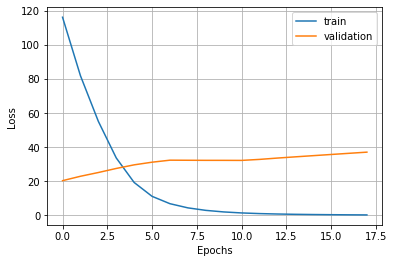

In [7]:
mlp = MLP(input_size, output_size)

trace_train, trace_val = mlp.train_mlp(X_train_transformed, X_val_transformed, X_test_transformed, y_train, y_val, y_test, hparams)

plot_curves(trace_train, trace_val)

## GraphSage

In [8]:
from src.tdde13.graphsage import GraphSAGE

X, y, edge_index, idx_train, idx_val, idx_test = get_data_graphsage()

use_glove = False
if use_glove:
    X_transformed = glove_embedding(X)
else:
    vectorizer = CountVectorizer()
    X_transformed = vectorizer.fit_transform(X)
    X_transformed = construct_sparse_tensor(X_transformed.tocoo())

10000
9892


In [ ]:
y = LabelEncoder().fit_transform(y)
y = torch.tensor(y)   

in_dim = X_transformed.shape[1] 
hidden_dim = 128
out_dim = 10

hparams = {
    "lr" : 0.001,
    "epochs" : 35, # 15,
    "batch_size" : 128,
    "patience" : 5,
    "use_glove" : use_glove
}

Error: Session cannot generate requests

In [ ]:
graphsage = GraphSAGE(in_dim=in_dim, hidden_dim=hidden_dim, out_dim=out_dim)

# graphsage.train_graphsage(X_transformed, edge_index, y, idx_train, idx_val, idx_test)
trace_train, trace_val = graphsage.train_graphsage_batchwise(X_transformed, edge_index, y, idx_train, idx_val, idx_test, hparams)

plot_curves(trace_train, trace_val)